In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.interpolate import interp1d

In [2]:
data = pd.read_csv('../data/b1c0_cycling_data.csv')
cycles = data.groupby('Cycle_Index')
cycle_dict = {}

for i in cycles:
    cycle_dict[i[0]] = i[1]

In [3]:
discharge_100 = cycle_dict[100][cycle_dict[100]['I'] < 0][
    cycle_dict[100][cycle_dict[100]['I'] < 0]['I'] < cycle_dict[100][cycle_dict[100]['I'] < 0]['I'].mean()*1.2]
discharge_10 = cycle_dict[10][cycle_dict[10]['I'] < 10][
    cycle_dict[10][cycle_dict[10]['I'] < 10]['I'] < cycle_dict[10][cycle_dict[10]['I'] < 0]['I'].mean()*1.2]

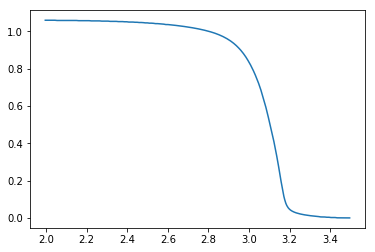

In [5]:
plt.plot(discharge_10['V'], discharge_10['Qd'])

In [12]:
discharge_10['V'].min()

1.9957494999999998

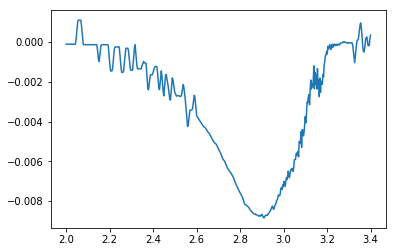

In [15]:
v_low = 2
v_high = 3.4
npoint = 500

x_common = np.linspace(v_low, v_high, num=npoint, endpoint=True)

f10 = interp1d(discharge_10['V'], discharge_10['Qd'])
f100 = interp1d(discharge_100['V'], discharge_100['Qd'])
dy_common = f100(x_common) - f10(x_common)
plt.plot(x_common, dy_common)

In [8]:
from math import log
from math import sqrt

# Minimum
print('Minimum of dQ:',log(abs(min(dy_common))))

# Mean
#lets find the close to 0 points, eg. 1/10 of max
npoint2=sum(dy_common<(min(dy_common))/20)

#print(npoint2)
dq_mean = sum(dy_common)/npoint2     ##
print('Average dQ between XXX : ', log(abs(dq_mean)))

dq_min = min(dy_common)              ##

dy_difference = dy_common-dq_mean

# Variance
V = sum(dy_difference**2)/(npoint2-1)
V = log(abs(V))
print('Variance:', V)

# Skewness

S = sum(dy_difference**3)/npoint2/(sqrt(sum(dy_difference**2))**3)
S = log(abs(S))
print('Skewness:', S)

# Kurtosis
 
K = sum((dy_difference**4)/npoint2/(sum(dy_difference**2)/npoint2)**2)    
K = log(abs(K))
print('Kurtosis:',K)

Minimum of dQ: -4.728051319591058
Average dQ between XXX :  -5.440362997224609
Variance: -11.095990496178082
Skewness: -9.51953112934698
Kurtosis: 0.03526441041931454


In [9]:
def discharge_curve_prep(battery_file):
    data = pd.read_csv('../data/' + battery_file)
    cycles = data.groupby('Cycle_Index')
    cycle_dict = {}

    for i in cycles:
        cycle_dict[i[0]] = i[1]
    
    dc100 = cycle_dict[100][cycle_dict[100]['I'] < 0][
        cycle_dict[100][cycle_dict[100]['I'] < 0]['I'] < cycle_dict[100][cycle_dict[100]['I'] < 0]['I'].mean()]
    dc10 = cycle_dict[10][cycle_dict[10]['I'] < 10][
        cycle_dict[10][cycle_dict[10]['I'] < 10]['I'] < cycle_dict[10][cycle_dict[10]['I'] < 0]['I'].mean()]
    
    plt.plot(dc10['t'], dc10['V'], label = 'Cycle 10')
    plt.plot(dc100['t'], dc100['V'], label = 'Cycle 100')
    plt.legend()
    plt.xlabel('Time (minutes)')
    plt.ylabel('Voltage (V)')
    plt.show()
    
    return(dc10, dc100)

In [16]:
def q_finder(dc10, dc100):
    v_low = 2
    v_high = 3.4
    npoint = 500

    x_common = np.linspace(v_low, v_high, num=npoint, endpoint=True)

    f10 = interp1d(dc10['V'], dc10['Qd'])
    f100 = interp1d(dc100['V'], dc100['Qd'])
    dy_common = f100(x_common) - f10(x_common)
    
    return x_common, dy_common

In [22]:
def extract_q_features(dy_common):
    from math import log
    from math import sqrt

    # Minimum
    qmin = log(abs(min(dy_common)))

    # Mean
    #lets find the close to 0 points, eg. 1/10 of max
    npoint2=sum(dy_common<(min(dy_common))/20)

    #print(npoint2)
    qmean = sum(dy_common)/npoint2     
    dy_difference = dy_common - dq_mean

    # Variance
    V = sum(dy_difference**2)/(npoint2-1)
    variance = log(abs(V))

    # Skewness

    S = sum(dy_difference**3)/npoint2/(sqrt(sum(dy_difference**2))**3)
    skewness = log(abs(S))

    # Kurtosis

    K = sum((dy_difference**4)/npoint2/(sum(dy_difference**2)/npoint2)**2)    
    kurtosis = log(abs(K))
    
    return(qmin, qmean, variance, skewness, kurtosis)

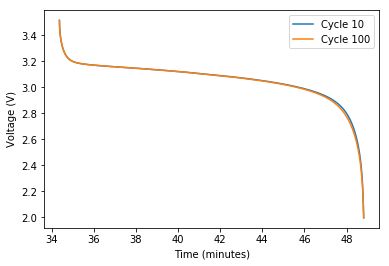

In [17]:
discharge_10, discharge_100 = discharge_curve_prep('b1c0_cycling_data.csv')

In [18]:
V, Q = q_finder(discharge_10, discharge_100)

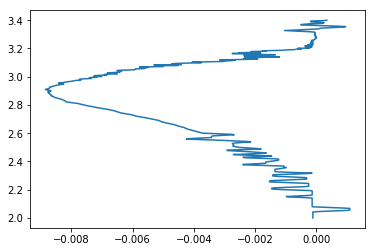

In [20]:
plt.plot(Q, V)

In [23]:
a, b, c, d, e = extract_q_features(Q)

In [24]:
print(a, b, c, d ,e)

-4.728051319591058 -0.004337908336221103 -11.095990496178082 -9.51953112934698 0.03526441041931454
